In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt

imagen = cv2.imread('C3.png')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

ret,bin = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
contorno, jerarquia = cv2.findContours(bin,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
perimitros = []
areas = []

for i in range(len(contorno)):
    cot = contorno[i]
    momento = cv2.moments(cot)
    if momento['m00'] !=0:
        cx = int(momento['m10']/momento['m00'])
        cy = int(momento['m01']/momento['m00'])
    else:
        cx, cy = 0, 0

    area = cv2.contourArea(cot)
    perimitro = cv2.arcLength(cot, True)

    perimitros.append(perimitro)
    areas.append(area)

    cv2.circle(imagen,(cx, cy),5 ,(0, 255, 0),-1)

    x, y, w, h = cv2.boundingRect(cot)
    cv2.rectangle(imagen, (x, y), (x+w, y+h), (0, 255, 0), 3)



plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(bin, cmap='gray')
plt.title('Imagen P, A,')
plt.axis('off')

for i, (perimitro, area) in enumerate(zip(perimitros, areas)):
    print(f'Contornos{i+1}: Perimetro{perimitro}, Area{area}')
    


REFERENCIA https://omes-va.com/detectando-figuras-geometricas-con-opencv-python/

Contorno 1: Rectangulo | Area: 25101.00, Perimetro: 655.31, Centro: (110,479)
Contorno 2: Circulo | Area: 19945.00, Perimetro: 529.87, Centro: (446,451)
Contorno 3: Circulo | Area: 19945.00, Perimetro: 529.87, Centro: (676,449)
Contorno 4: Cuadrado | Area: 10566.00, Perimetro: 412.32, Centro: (277,307)
Contorno 5: Rectangulo | Area: 11531.00, Perimetro: 432.47, Centro: (344,132)
Contorno 6: Circulo | Area: 19960.00, Perimetro: 533.87, Centro: (163,128)
Contorno 7: Rectangulo | Area: 25101.00, Perimetro: 655.31, Centro: (603,96)


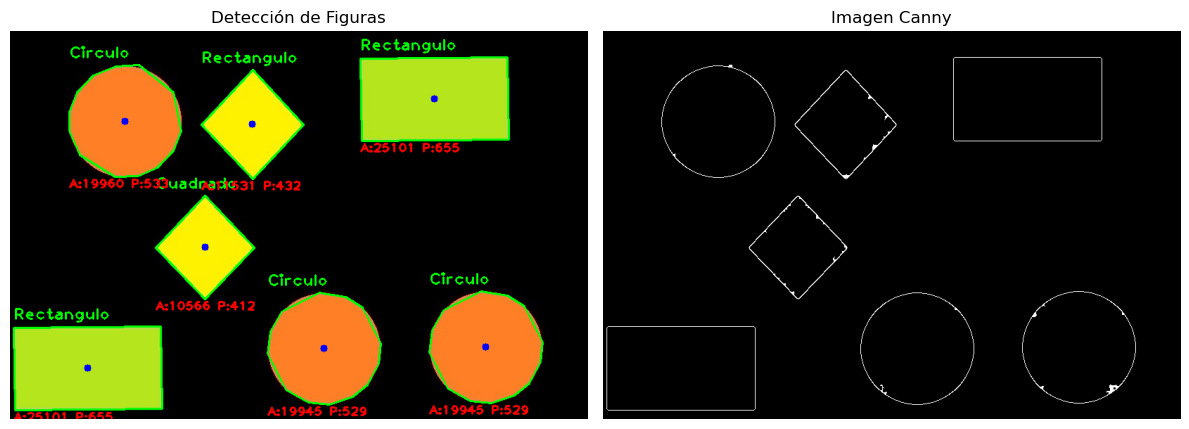

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

# Leer imagen y preprocesar
image = cv2.imread('figurascolore2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)

# Encontrar contornos
cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Procesar cada contorno
for i, c in enumerate(cnts):
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)

    # Calcular momentos y centroide
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Calcular área y perímetro
    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)

    # Dibujar contorno y centroide
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)

    # Mostrar información
    x, y, w, h = cv2.boundingRect(approx)
    
    texto = ''
    if len(approx) == 3:
        texto = 'Triangulo'
    elif len(approx) == 4:
        aspect_ratio = float(w)/h
        texto = 'Cuadrado' if 0.95 <= aspect_ratio <= 1.05 else 'Rectangulo'
    elif len(approx) == 5:
        texto = 'Pentagono'
    elif len(approx) == 6:
        texto = 'Hexagono'
    elif len(approx) > 10:
        texto = 'Circulo'
    else:
        texto = 'Poligono'

    cv2.putText(image, f'{texto}', (x, y - 10), 1, 1.5, (0, 255, 0), 2)
    cv2.putText(image, f'A:{int(area)} P:{int(perimetro)}', (x, y + h + 15), 1, 1.2, (0, 0, 255), 2)

    print(f'Contorno {i+1}: {texto} | Area: {area:.2f}, Perimetro: {perimetro:.2f}, Centro: ({cx},{cy})')

# Mostrar resultados con matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detección de Figuras')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title('Imagen Canny')
plt.axis('off')

plt.tight_layout()
plt.show()


Contorno 1: Hexagono | Área: 16014.00, Perímetro: 492.62, Centro: (334,331)
Contorno 2: Pentagono | Área: 15408.00, Perímetro: 496.76, Centro: (138,338)
Contorno 3: Rectangulo | Área: 19136.50, Perímetro: 560.24, Centro: (518,321)
Contorno 4: Cuadrado | Área: 12096.00, Perímetro: 437.66, Centro: (514,117)
Contorno 5: Triangulo | Área: 7422.00, Perímetro: 407.02, Centro: (321,135)
Contorno 6: Circulo | Área: 12241.00, Perímetro: 414.48, Centro: (132,122)


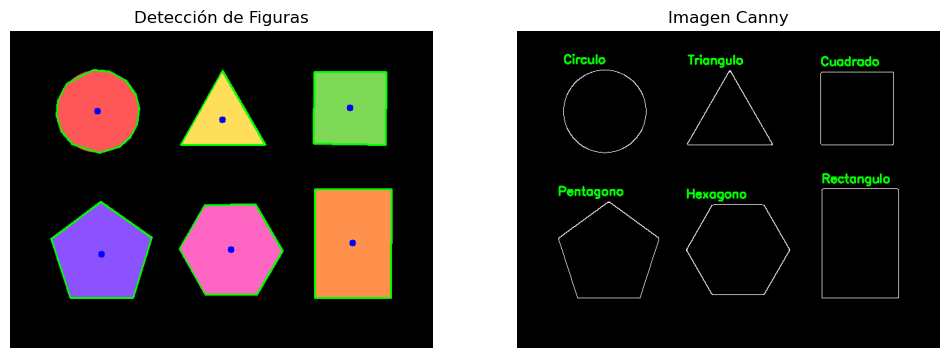

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

image = cv2.imread('figurascolore2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)

canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)

canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
contornos, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, c in enumerate(contornos):
    epsilon = 0.01 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    vertices = len(approx)

    M = cv2.moments(c)
    huMoments = cv2.HuMoments(M).flatten()

    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)

    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)

    if vertices == 3:
        texto = 'Triangulo'
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w)/h
        texto = 'Cuadrado' if 0.95 <= aspect_ratio <= 1.05 else 'Rectangulo'
    elif vertices == 5:
        texto = 'Pentagono'
    elif vertices == 6:
        texto = 'Hexagono'
    elif vertices > 10:
        texto = 'Circulo'
    else:
        texto = 'Poligono'

    x, y, w, h = cv2.boundingRect(approx)


    cv2.putText(canny_color, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    print(f'Contorno {i+1}: {texto} | Área: {area:.2f}, Perímetro: {perimetro:.2f}, Centro: ({cx},{cy})')
    print(f'  Momentos de Hu: {[float(f"{h:.5e}") for h in huMoments]}\n')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detección de Figuras')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(canny_color, cv2.COLOR_BGR2RGB))
plt.title('Imagen Canny con etiquetas')
plt.axis('off')

plt.show()
